<a href="https://colab.research.google.com/github/WENDELLDELIMA/Mestrado_Mackenzie_Aprendizado_Maquina/blob/main/Mackenzie_Aprendizado_de_maquina_MLP_X_PROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Libs



In [402]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importação do Dataset

Foi utilizado o arquivo **`ghg-emissions.csv`**, proveniente do *Greenhouse Gas Protocol (GHG Protocol)*, equivalente ao **GEE (Gases de Efeito Estufa)** no Brasil.  
O dataset contém as emissões anuais de gases de efeito estufa por país, expressas em **milhões de toneladas de CO₂ equivalente (MtCO₂e)**, no período de **1990 a 2022**.  

As principais colunas são:  
- `iso`: código ISO do país.  
- `Country/Region`: nome do país ou região.  
- `unit`: unidade de medida (MtCO₂e).  
- Colunas de anos (1990–2022) com os valores de emissões.


In [403]:
ghg_emissions_df = pd.read_csv("ghg-emissions.csv")
ghg_emissions_df.describe()

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,169.693316,170.669223,171.901554,175.905544,177.781917,184.762176,181.969793,181.572539,184.847461,185.346995,...,236.994611,240.141399,239.306891,242.096477,245.573523,251.220622,253.286891,243.303990,253.777254,255.404819
std,533.173922,542.637581,550.376065,568.466979,577.084727,601.843722,597.697679,595.609966,611.300931,615.892956,...,949.632114,960.844640,949.168791,950.889792,966.557465,1006.690924,1019.665269,1006.630869,1057.262756,1063.226372
min,-6.200000,-6.220000,-6.180000,-6.130000,-6.070000,-5.980000,-5.970000,-5.950000,-5.980000,-5.930000,...,-180.870000,-181.480000,-179.390000,-0.800000,-0.610000,-0.550000,-0.420000,-0.860000,-0.850000,-0.850000
25%,6.740000,6.860000,6.490000,6.770000,7.000000,7.250000,7.590000,7.860000,7.290000,6.940000,...,9.330000,9.280000,8.970000,9.580000,9.860000,10.530000,10.290000,10.350000,11.020000,10.850000
50%,27.920000,27.290000,29.200000,30.030000,30.090000,33.920000,31.860000,32.460000,33.100000,32.440000,...,34.780000,34.480000,35.700000,40.210000,41.100000,41.370000,42.530000,42.640000,44.850000,44.400000
75%,101.900000,102.310000,101.810000,107.220000,102.240000,102.040000,106.770000,110.800000,112.170000,120.310000,...,120.880000,118.180000,119.960000,129.850000,126.970000,128.440000,127.400000,121.820000,128.190000,133.010000
max,5506.440000,5615.490000,5709.340000,5777.030000,5947.730000,6206.910000,6252.240000,6251.790000,6413.360000,6378.390000,...,11175.260000,11237.610000,11085.850000,11135.020000,11376.550000,11868.700000,12109.180000,12263.690000,12852.140000,12851.840000


In [404]:
#pegando informacoes sobre os dados

ghg_emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso             195 non-null    object 
 1   Country/Region  195 non-null    object 
 2   unit            193 non-null    object 
 3   1990            193 non-null    object 
 4   1991            193 non-null    object 
 5   1992            193 non-null    float64
 6   1993            193 non-null    float64
 7   1994            193 non-null    float64
 8   1995            193 non-null    float64
 9   1996            193 non-null    float64
 10  1997            193 non-null    float64
 11  1998            193 non-null    float64
 12  1999            193 non-null    float64
 13  2000            193 non-null    float64
 14  2001            193 non-null    float64
 15  2002            193 non-null    float64
 16  2003            193 non-null    float64
 17  2004            193 non-null    flo



> Mesmo sem ter analisado os dados, aqui ja vemos que o dataframe esta em um modelo wide, onde os anos e suas emissoes estao como colunas.



In [405]:
# Transformar de wide -> long de forma direta
ghg_emissions_df = ghg_emissions_df.melt(
    id_vars=["iso", "Country/Region", "unit"],  # colunas fixas
    var_name="year",
    value_name="emissions"
)

# Converter ano para inteiro
ghg_emissions_df["year"] = ghg_emissions_df["year"].astype(int)

ghg_emissions_df.head()


,iso,Country/Region,unit,year,emissions
0,CHN,China,MtCO2e,1990,3049.87
1,USA,United States,MtCO2e,1990,5472.89
2,IND,India,MtCO2e,1990,1126.56
3,RUS,Russia,MtCO2e,1990,2618.14
4,BRA,Brazil,MtCO2e,1990,1675.44


In [406]:
# Renomear colunas para português
ghg_emissions_df = ghg_emissions_df.rename(columns={
    "iso": "codigo_iso",
    "Country/Region": "pais_regiao",
    "unit": "unidade",
    "year": "ano",
    "emissions": "emissoes"
})

ghg_emissions_df.head()

,codigo_iso,pais_regiao,unidade,ano,emissoes
0,CHN,China,MtCO2e,1990,3049.87
1,USA,United States,MtCO2e,1990,5472.89
2,IND,India,MtCO2e,1990,1126.56
3,RUS,Russia,MtCO2e,1990,2618.14
4,BRA,Brazil,MtCO2e,1990,1675.44



> MtCO₂e = Milhões de toneladas de CO₂ equivalente


> **Brasil 1990 → 1675.44 MtCO₂e**, isso significa que o Brasil emitiu cerca de 1.675 milhões de toneladas de gases de efeito estufa, convertidos em equivalentes de dióxido de carbono.

# Verificando Colunas que os dados são nulos

In [407]:
ghg_emissions_df.isnull().sum()


,0
codigo_iso,0
pais_regiao,0
unidade,66
ano,0
emissoes,66


In [408]:
# verificando quais paises que as emissoes sao nulas...

ghg_emissions_df[ghg_emissions_df["emissoes"].isnull()]


,codigo_iso,pais_regiao,unidade,ano,emissoes
193,Data source,Climate Watch,NaN,1990,NaN
194,Data for,Location: World. Sectors/Subsectors: Total inc...,NaN,1990,NaN
388,Data source,Climate Watch,NaN,1991,NaN
389,Data for,Location: World. Sectors/Subsectors: Total inc...,NaN,1991,NaN
583,Data source,Climate Watch,NaN,1992,NaN
...,...,...,...,...,...
6044,Data for,Location: World. Sectors/Subsectors: Total inc...,NaN,2020,NaN
6238,Data source,Climate Watch,NaN,2021,NaN
6239,Data for,Location: World. Sectors/Subsectors: Total inc...,NaN,2021,NaN
6433,Data source,Climate Watch,NaN,2022,NaN




> Essas informações são descritivos que estavam denro do CSV, sobre o mapeamento e setores dos dados. iremos remove-los.



In [409]:
#removendo linhas sem emissoes.
# Remove qualquer linha onde 'emissoes' seja NaN
ghg_emissions_df = ghg_emissions_df[ghg_emissions_df["emissoes"].notna()]


In [410]:
#verificando
ghg_emissions_df.isnull().sum()

,0
codigo_iso,0
pais_regiao,0
unidade,0
ano,0
emissoes,0


## 🌍 Marcos Históricos do Clima e sua Relevância para as Emissões

Ao longo da análise das séries temporais de emissões de gases de efeito estufa (GEE), alguns **anos-chave** se destacam por coincidirem com tratados e relatórios internacionais. Eles podem ser usados como **pontos de referência nos gráficos de somatórias das emissões**.

---

### 📌 1997 – Protocolo de Quioto
- Assinado no Japão, estabeleceu **metas obrigatórias de redução de emissões** para países desenvolvidos.  
- **Período de compromisso inicial**: 2008–2012.  
- Primeiro tratado internacional com **obrigações legais** sobre emissões de gases de efeito estufa.

---

### 📌 2005 – Entrada em vigor do Protocolo de Quioto
- Só passou a valer depois que a **Rússia ratificou**.  
- A partir daqui, começou a **cobrança efetiva das metas** para os países signatários.

---

### 📌 2007 – Relatório do IPCC (AR4)
- Reconhecimento quase unânime da comunidade científica sobre a **influência humana no aquecimento global**.  
- Representou um marco no **discurso político internacional** sobre mudanças climáticas.

---

### 📌 2015 – Acordo de Paris (COP21)
- Substituiu o Protocolo de Quioto.  
- Todos os países (desenvolvidos e em desenvolvimento) passaram a assumir **metas nacionais próprias (NDCs – Contribuições Nacionalmente Determinadas)**.  
- Objetivo: **limitar o aquecimento global a 1,5–2 °C** até 2100.  
- Ano de referência fundamental para análises de compromissos versus emissões reais.

---


## 🌍 Grupos de Países no Protocolo de Quioto

Para a análise de emissões, os países podem ser divididos em **três grandes grupos**, de acordo com o Protocolo de Quioto:

---

### 📌 Grupo 1 – Países com Metas Obrigatórias (Anexo I)
- **Descrição:** Países desenvolvidos que assumiram metas legais de redução de emissões no primeiro período de compromisso (2008–2012).  
- **Exemplos:** Alemanha, França, Reino Unido, Japão, Rússia, Canadá, Austrália.  
- **Observação:** Os **EUA assinaram, mas nunca ratificaram**, por isso ficam fora deste grupo.  

**Lista ISO3 (exemplo):**


In [411]:
#Países desenvolvidos que assumiram metas legais de redução de emissões no primeiro período de compromisso (2008–2012).
grupo1_meta = [
    "AUS","AUT","BEL","BGR","CAN","HRV","CYP","CZE","DNK","EST","FIN","FRA",
    "DEU","GRC","HUN","ISL","IRL","ITA","JPN","LVA","LIE","LTU","LUX","MLT",
    "MCO","NLD","NZL","NOR","POL","PRT","ROU","SVK","SVN","ESP","SWE","CHE",
    "TUR","UKR","GBR","RUS"
]


---

### 📌 Grupo 2 – Países em Desenvolvimento (Sem Metas no 1º Período)
- **Descrição:** Assinaram e ratificaram o Protocolo, mas **não tinham metas obrigatórias de redução**.  
- **Participavam via mecanismos de desenvolvimento limpo (MDL)**.  
- **Exemplos:** Brasil, China, Índia, México, África do Sul.  

**Lista ISO3 (exemplo):**


In [412]:
#assinaram e ratificaram o Protocolo, mas não tinham metas obrigatórias de redução.
grupo2_desenvolvimento = [
    "BRA","CHN","IND","MEX","ZAF","IDN","ARG","CHL","COL","PER",
    "EGY","THA","PHL","MYS","VNM","PAK","NGA"
]


---

### 📌 Grupo 3 – Não Ratificaram
- **Descrição:** Países que não ratificaram o Protocolo.  
- **Exemplo principal:** Estados Unidos.  

**Lista ISO3:**


In [413]:
#Países que não ratificaram o Protocolo.
grupo3_nao = ["USA"]


Agora que sabemos que temos 3 grupos de paises, iremos criar uma função para

classificar a qual grupo pertence cada linha no pais.

In [414]:
def classificar_pais(iso):
    if iso in grupo1_meta:
        return "Com Metas (Anexo I)"
    elif iso in grupo2_desenvolvimento:
        return "Em Desenvolvimento (sem metas)"
    elif iso in grupo3_nao:
        return "Não Ratificaram"
    else:
        return "Outros"

ghg_emissions_df["grupo_quioto"] = ghg_emissions_df["codigo_iso"].apply(classificar_pais)


In [415]:
ghg_emissions_df.head()

,codigo_iso,pais_regiao,unidade,ano,emissoes,grupo_quioto
0,CHN,China,MtCO2e,1990,3049.87,Em Desenvolvimento (sem metas)
1,USA,United States,MtCO2e,1990,5472.89,Não Ratificaram
2,IND,India,MtCO2e,1990,1126.56,Em Desenvolvimento (sem metas)
3,RUS,Russia,MtCO2e,1990,2618.14,Com Metas (Anexo I)
4,BRA,Brazil,MtCO2e,1990,1675.44,Em Desenvolvimento (sem metas)


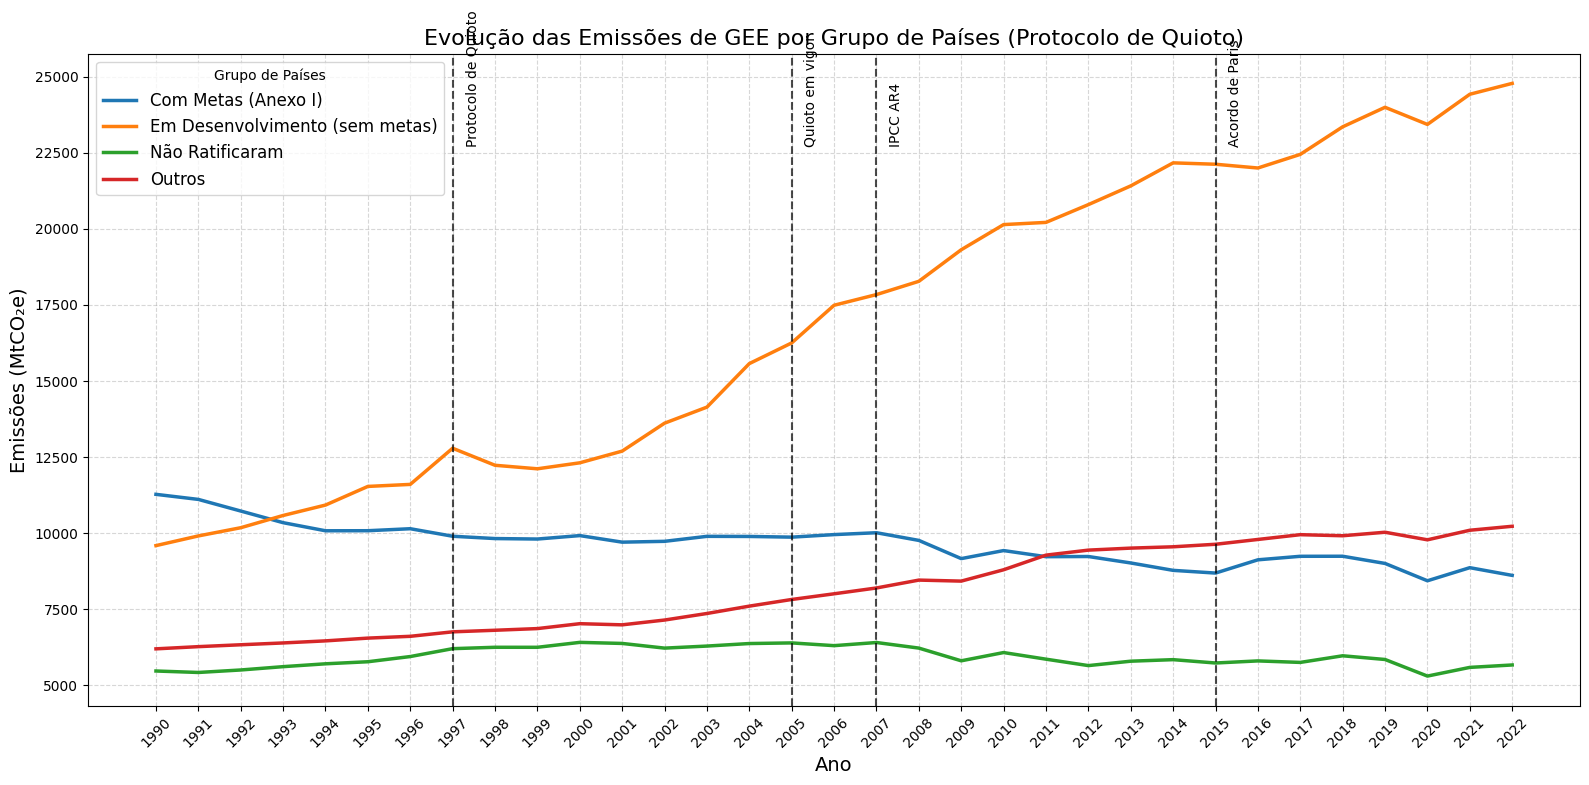

In [416]:


# Create a copy to avoid SettingWithCopyWarning
ghg_emissions_df_copy = ghg_emissions_df.copy()

# Replace 'false' with NaN and then drop rows with NaN in 'emissoes'
ghg_emissions_df_copy['emissoes'] = ghg_emissions_df_copy['emissoes'].replace('false', np.nan)
ghg_emissions_df_copy = ghg_emissions_df_copy.dropna(subset=['emissoes'])

# Ensure the 'emissoes' column is numeric before grouping and summing
ghg_emissions_df_copy['emissoes'] = pd.to_numeric(ghg_emissions_df_copy['emissoes'])

# Garantir que temos o dataframe agregado por ano e grupo
df_somas = (
    ghg_emissions_df_copy
    .groupby(["ano","grupo_quioto"])["emissoes"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(16,8))
sns.lineplot(data=df_somas, x="ano", y="emissoes", hue="grupo_quioto", linewidth=2.5)

# 📌 Adicionando marcos históricos (linhas verticais)
marcos = {
    1997: "Protocolo de Quioto",
    2005: "Quioto em vigor",
    2007: "IPCC AR4",
    2015: "Acordo de Paris"
}

for ano, evento in marcos.items():
    plt.axvline(x=ano, color="black", linestyle="--", alpha=0.7)
    plt.text(ano+0.3, df_somas["emissoes"].max()*0.92, evento, rotation=90, fontsize=10)

# ✅ Forçar todos os anos no eixo X
anos = sorted(df_somas["ano"].unique())
plt.xticks(anos, rotation=45)

# Ajustes do gráfico
plt.title("Evolução das Emissões de GEE por Grupo de Países (Protocolo de Quioto)", fontsize=16)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Emissões (MtCO₂e)", fontsize=14)
plt.legend(title="Grupo de Países", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


*da forma que vemos, estamos vendo apenas os numeros absolutos, o que não condiz com a verdade do grupo, precisamos criar uma medida que possamos mensurar, por espaco geometrico ou por numero de pessoas.*

In [417]:
# carregando dados populacionais
populacao_df = pd.read_csv("populacional.csv")

# Simplificar e transformar de wide para long
populacao_df = populacao_df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="ano",
    value_name="populacao"
)

# Renomear colunas para português e converter ano para inteiro
populacao_df = populacao_df.rename(columns={
    "Country Code": "codigo_iso"
})
populacao_df["ano"] = populacao_df["ano"].astype(int)

# Simplificar população dataframe
populacao_df = populacao_df[["codigo_iso", "ano", "populacao"]]


# Merge emissões + população
ghg_emissions_df_copy = pd.merge(
    ghg_emissions_df_copy,
    populacao_df,
    on=["codigo_iso","ano"],
    how="inner"
)

In [418]:
# Convert emissions from MtCO2e to tons
ghg_emissions_df_copy["emissoes_t"] = ghg_emissions_df_copy["emissoes"] * 1_000_000

# Display the columns of ghg_emissions_df_copy to identify the correct population column name
print(ghg_emissions_df_copy.columns)


# Aggregate by group and year (using sum of emissions and sum of population)
df_grp = (
    ghg_emissions_df_copy
    .groupby(["ano","grupo_quioto"])
    .agg(emissoes_Mt=("emissoes", "sum"),
         populacao=("populacao", "sum")) # Corrected column name to 'populacao'
    .reset_index()
)

# Calculate per capita correctly
df_grp["percapita_t"] = (df_grp["emissoes_Mt"] * 1_000_000) / df_grp["populacao"]

display(df_grp.head())

Index(['codigo_iso', 'pais_regiao', 'unidade', 'ano', 'emissoes',
       'grupo_quioto', 'populacao', 'emissoes_t'],
      dtype='object')


,ano,grupo_quioto,emissoes_Mt,populacao,percapita_t
0,1990,Com Metas (Anexo I),11277.30,9.143128e+08,12.334182
1,1990,Em Desenvolvimento (sem metas),9592.62,3.024157e+09,3.171998
2,1990,Não Ratificaram,5472.89,2.496230e+08,21.924622
3,1990,Outros,6200.77,1.055292e+09,5.875882
4,1991,Com Metas (Anexo I),11110.69,9.185199e+08,12.096297


In [419]:
import logging

# Configure logging to suppress INFO and DEBUG messages from cmdstanpy and prophet
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
logging.getLogger('prophet').setLevel(logging.WARNING)

print("Logging levels for cmdstanpy and prophet set to WARNING.")

Logging levels for cmdstanpy and prophet set to WARNING.


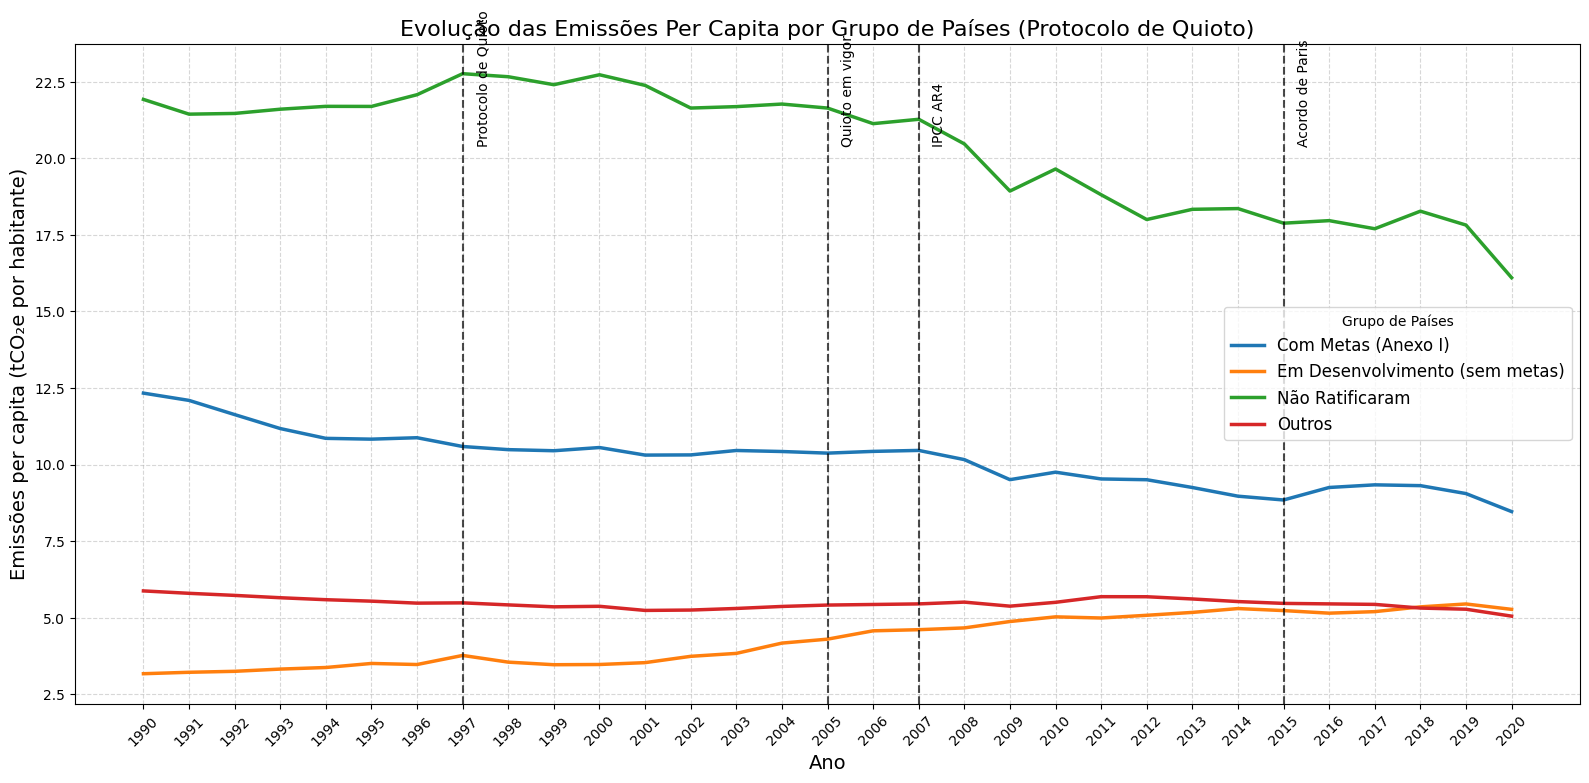

In [420]:
plt.figure(figsize=(16,8))
sns.lineplot(
    data=df_grp,  # ✅ aqui tem que ser df_grp
    x="ano", y="percapita_t",
    hue="grupo_quioto", linewidth=2.5
)

# 📌 Adicionando marcos históricos
for ano, evento in marcos.items():
    plt.axvline(x=ano, color="black", linestyle="--", alpha=0.7)
    plt.text(
        ano+0.3,
        df_grp["percapita_t"].max()*0.9,
        evento, rotation=90, fontsize=10
    )

plt.title("Evolução das Emissões Per Capita por Grupo de Países (Protocolo de Quioto)", fontsize=16)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Emissões per capita (tCO₂e por habitante)", fontsize=14)
plt.legend(title="Grupo de Países", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(sorted(df_grp["ano"].unique()), rotation=45)
plt.tight_layout()
plt.show()


In [421]:
df_grp.head()

,ano,grupo_quioto,emissoes_Mt,populacao,percapita_t
0,1990,Com Metas (Anexo I),11277.30,9.143128e+08,12.334182
1,1990,Em Desenvolvimento (sem metas),9592.62,3.024157e+09,3.171998
2,1990,Não Ratificaram,5472.89,2.496230e+08,21.924622
3,1990,Outros,6200.77,1.055292e+09,5.875882
4,1991,Com Metas (Anexo I),11110.69,9.185199e+08,12.096297


In [422]:
# === Definição dos anos principais ===
ANO_INICIO = 1997
ANO_TREINO_FIM = 2015
ANO_TESTE_FIM = 2020
ANO_PREVISAO_FIM = 2030
META_CO2 = 6.0  # toneladas per capita

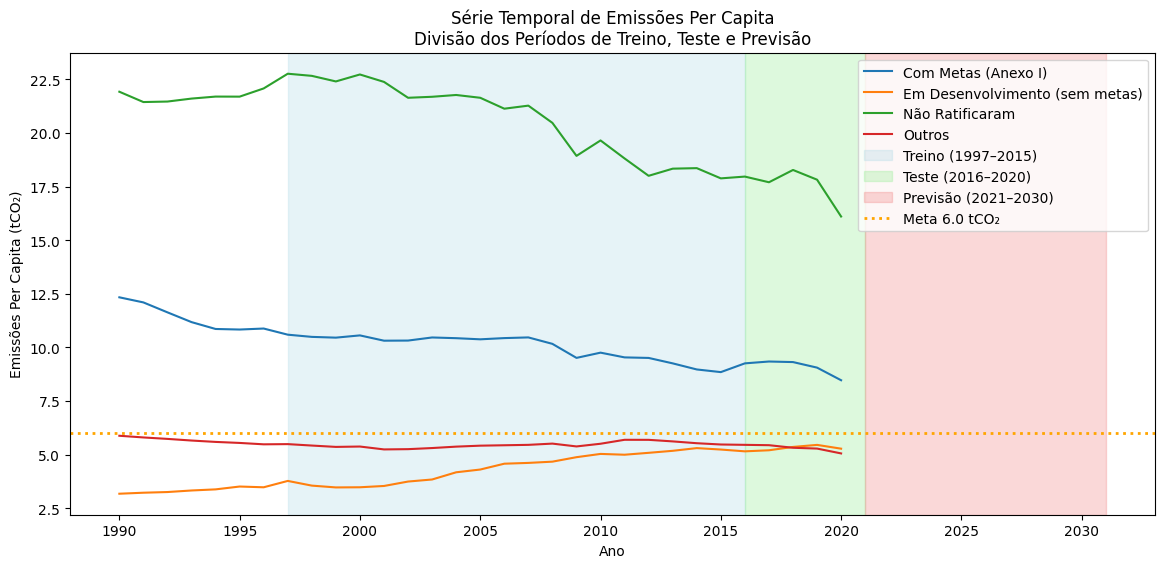

In [423]:

# Exemplo com todos os grupos agregados (se quiser, dá para fazer por grupo também)
df_plot = df_grp.copy()
df_plot = df_plot.rename(columns={'ano': 'ds', 'percapita_t': 'y'})
df_plot['ds'] = pd.to_datetime(df_plot['ds'].astype(int).astype(str) + '-01-01')

plt.figure(figsize=(14,6))

# Linha do realizado (dados completos)
for grupo in df_plot['grupo_quioto'].unique():
    dados = df_plot[df_plot['grupo_quioto'] == grupo]
    plt.plot(dados['ds'], dados['y'], label=grupo)

# Fundo colorido para os períodos
plt.axvspan(pd.to_datetime(f'{ANO_INICIO}-01-01'),
            pd.to_datetime(f'{ANO_TREINO_FIM}-12-31'),
            color="lightblue", alpha=0.3, label="Treino (1997–2015)")

plt.axvspan(pd.to_datetime(f'{ANO_TREINO_FIM+1}-01-01'),
            pd.to_datetime(f'{ANO_TESTE_FIM}-12-31'),
            color="lightgreen", alpha=0.3, label="Teste (2016–2020)")

plt.axvspan(pd.to_datetime(f'{ANO_TESTE_FIM+1}-01-01'),
            pd.to_datetime(f'{ANO_PREVISAO_FIM}-12-31'),
            color="lightcoral", alpha=0.3, label="Previsão (2021–2030)")

# Meta
plt.axhline(META_CO2, color="orange", linestyle=":", linewidth=2, label=f"Meta {META_CO2} tCO₂")

plt.title("Série Temporal de Emissões Per Capita\nDivisão dos Períodos de Treino, Teste e Previsão")
plt.xlabel("Ano")
plt.ylabel("Emissões Per Capita (tCO₂)")
plt.legend()
plt.show()

Processando grupo: Com Metas (Anexo I)
RMSE (Prophet) para Com Metas (Anexo I): 0.7439


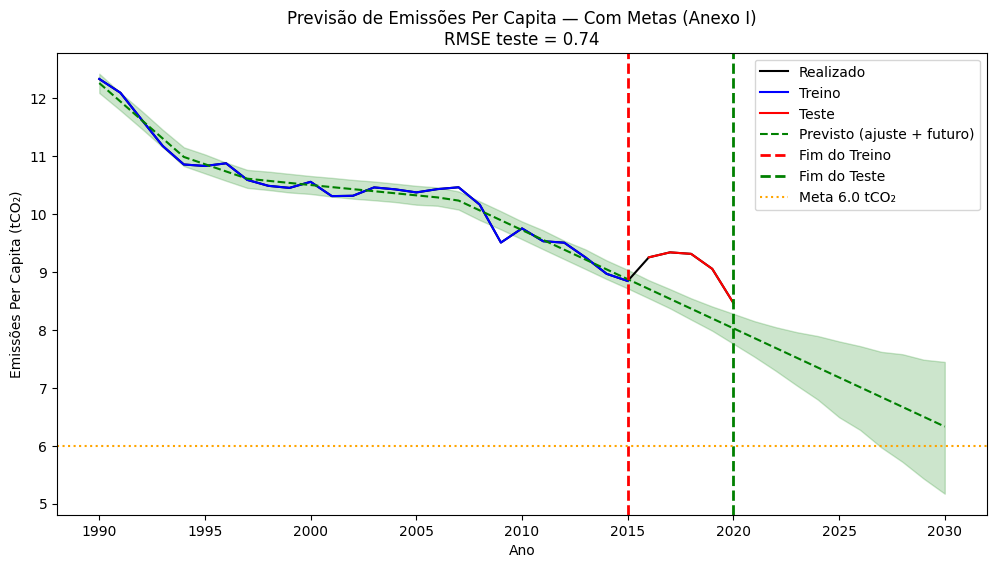

Processando grupo: Em Desenvolvimento (sem metas)
RMSE (Prophet) para Em Desenvolvimento (sem metas): 0.5267


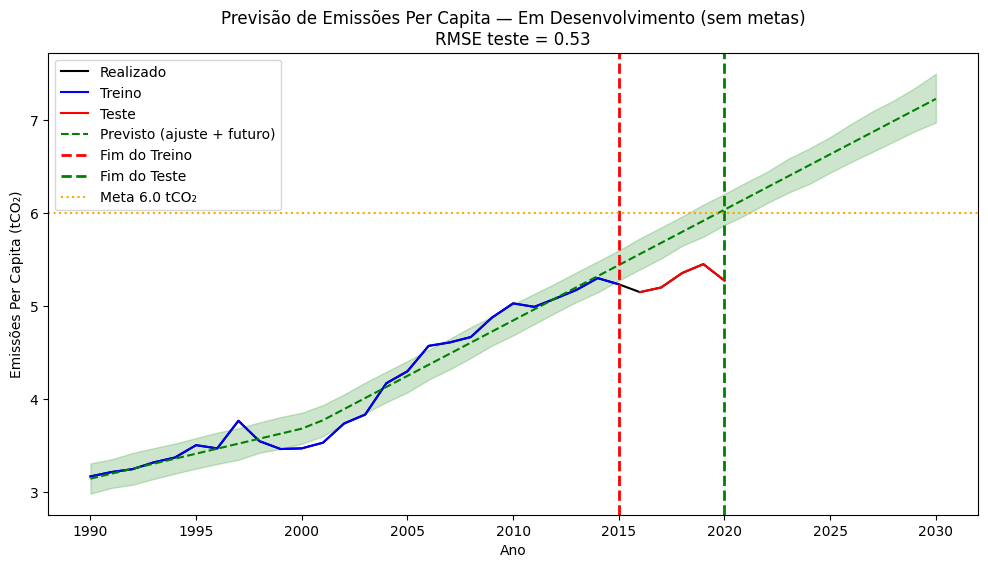

Processando grupo: Não Ratificaram
RMSE (Prophet) para Não Ratificaram: 1.1709


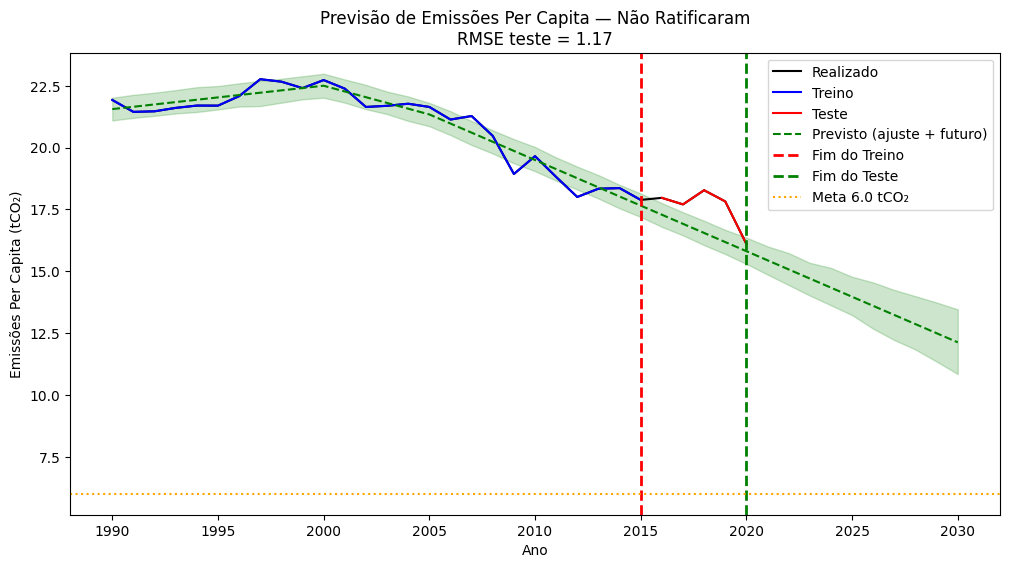

Processando grupo: Outros
RMSE (Prophet) para Outros: 0.4183


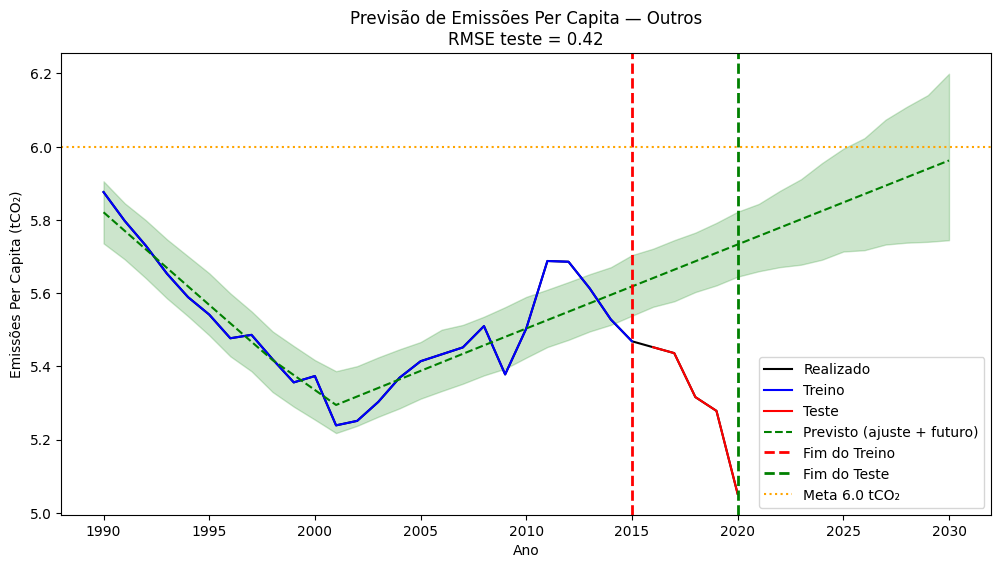


RMSE final para cada grupo (Prophet):
{'Com Metas (Anexo I)': np.float64(0.7438980970141646), 'Em Desenvolvimento (sem metas)': np.float64(0.5266972623789891), 'Não Ratificaram': np.float64(1.1708665423239126), 'Outros': np.float64(0.4183475860131464)}


In [424]:
resultados_prophet = {}
rmse_prophet = {}

for grupo in df_grp['grupo_quioto'].unique():
    print(f"Processando grupo: {grupo}")

    # Base do grupo no padrão Prophet
    df_grupo = df_grp[df_grp['grupo_quioto'] == grupo].copy()
    df_grupo = df_grupo.rename(columns={'ano': 'ds', 'percapita_t': 'y'})
    # Use YS (Year Start) para alinhar com 01-01
    df_grupo['ds'] = pd.to_datetime(df_grupo['ds'].astype(int).astype(str) + '-01-01')

    # Split
    treino = df_grupo[df_grupo['ds'].dt.year <= ANO_TREINO_FIM]
    teste  = df_grupo[(df_grupo['ds'].dt.year > ANO_TREINO_FIM) & (df_grupo['ds'].dt.year <= ANO_TESTE_FIM)]

    if teste.empty:
        print(f"Skipping group {grupo} devido a conjunto de teste vazio.")
        continue

    # Treino Prophet (sem sazonalidades intra-ano para dados anuais)
    modelo = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
    modelo.fit(treino[['ds', 'y']])

    # FUTURO + HISTÓRICO: inclui o histórico para vermos o ajuste no treino
    periods = ANO_PREVISAO_FIM - ANO_TREINO_FIM  # anos após 2015
    futuro = modelo.make_future_dataframe(periods=periods, freq="YS", include_history=True)
    previsao = modelo.predict(futuro)

    # Guarda previsões
    resultados_prophet[grupo] = previsao

    # RMSE no TESTE (2016–2020) usando as MESMAS datas
    previsao_teste = previsao[previsao['ds'].isin(teste['ds'])]
    if not previsao_teste.empty:
        mse = mean_squared_error(teste['y'], previsao_teste['yhat'])
        rmse = np.sqrt(mse)
    else:
        rmse = np.nan
    rmse_prophet[grupo] = rmse
    print(f"RMSE (Prophet) para {grupo}: {rmse:.4f}")

    # ----- Plot didático -----
    plt.figure(figsize=(12,6))

    # Realizado (toda série)
    plt.plot(df_grupo["ds"], df_grupo["y"], color="black", label="Realizado")

    # Treino e Teste (subconjuntos do realizado)
    plt.plot(treino["ds"], treino["y"], color="blue", label="Treino")
    plt.plot(teste["ds"],  teste["y"],  color="red",  label="Teste")

    # Previsto (ajuste no histórico + futuro)
    plt.plot(previsao["ds"], previsao["yhat"], linestyle="--", color="green", label="Previsto (ajuste + futuro)")
    plt.fill_between(previsao["ds"], previsao["yhat_lower"], previsao["yhat_upper"], alpha=0.2, color="green")

    # Cortes e meta
    plt.axvline(pd.to_datetime(f'{ANO_TREINO_FIM}-01-01'), color='r', linestyle='--', lw=2, label='Fim do Treino')
    plt.axvline(pd.to_datetime(f'{ANO_TESTE_FIM}-01-01'),  color='g', linestyle='--', lw=2, label='Fim do Teste')
    plt.axhline(META_CO2, color="orange", linestyle=":", label=f"Meta {META_CO2} tCO₂")

    plt.title(f'Previsão de Emissões Per Capita — {grupo}\nRMSE teste = {rmse:.2f}')
    plt.xlabel('Ano'); plt.ylabel('Emissões Per Capita (tCO₂)')
    plt.legend()
    plt.show()

print("\nRMSE final para cada grupo (Prophet):")
print(rmse_prophet)


In [425]:
print("\nRMSE final para cada grupo (Prophet):")
print(rmse_prophet)


RMSE final para cada grupo (Prophet):
{'Com Metas (Anexo I)': np.float64(0.7438980970141646), 'Em Desenvolvimento (sem metas)': np.float64(0.5266972623789891), 'Não Ratificaram': np.float64(1.1708665423239126), 'Outros': np.float64(0.4183475860131464)}


In [426]:
# Transformar o dicionário rmse_prophet em um DataFrame
df_rmse_prophet = pd.DataFrame.from_dict(rmse_prophet, orient='index', columns=['RMSE'])

# Resetar o índice para ter o nome do grupo como uma coluna
df_rmse_prophet.reset_index(inplace=True)
df_rmse_prophet.rename(columns={'index': 'Grupo de Países'}, inplace=True)

# Formatar a coluna RMSE
df_rmse_prophet['RMSE'] = df_rmse_prophet['RMSE'].map("{:.4f}".format)

# Exibir a tabela
display(df_rmse_prophet)

,Grupo de Países,RMSE
0,Com Metas (Anexo I),0.7439
1,Em Desenvolvimento (sem metas),0.5267
2,Não Ratificaram,1.1709
3,Outros,0.4183


In [427]:
df_grp.head()

,ano,grupo_quioto,emissoes_Mt,populacao,percapita_t
0,1990,Com Metas (Anexo I),11277.30,9.143128e+08,12.334182
1,1990,Em Desenvolvimento (sem metas),9592.62,3.024157e+09,3.171998
2,1990,Não Ratificaram,5472.89,2.496230e+08,21.924622
3,1990,Outros,6200.77,1.055292e+09,5.875882
4,1991,Com Metas (Anexo I),11110.69,9.185199e+08,12.096297


In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# ordenar e manter só o que precisamos
df_base = (df_grp[['ano','grupo_quioto','percapita_t']]
           .sort_values(['grupo_quioto','ano'])
           .copy())

# datas para o gráfico idêntico ao Prophet
df_base['ds'] = pd.to_datetime(df_base['ano'].astype(int).astype(str) + '-01-01')


In [429]:
K_LAGS = 2

In [430]:
lags_por_grupo = {}

for grupo in df_base['grupo_quioto'].unique():
    d = df_base[df_base['grupo_quioto']==grupo].copy().sort_values('ano')
    # criar colunas lag_1..lag_K
    for i in range(1, K_LAGS+1):
        d[f'lag_{i}'] = d['percapita_t'].shift(i)
    d = d.dropna().copy()                 # remove linhas sem todos os lags
    d['ano_feat'] = d['ano']              # feature simples de tendência
    d['ds'] = pd.to_datetime(d['ano'].astype(str) + '-01-01')
    lags_por_grupo[grupo] = d


In [431]:
print(lags_por_grupo)

{'Com Metas (Anexo I)':       ano         grupo_quioto  percapita_t         ds      lag_1      lag_2  \
8    1992  Com Metas (Anexo I)    11.633328 1992-01-01  12.096297  12.334182   
12   1993  Com Metas (Anexo I)    11.177310 1993-01-01  11.633328  12.096297   
16   1994  Com Metas (Anexo I)    10.857128 1994-01-01  11.177310  11.633328   
20   1995  Com Metas (Anexo I)    10.831267 1995-01-01  10.857128  11.177310   
24   1996  Com Metas (Anexo I)    10.877876 1996-01-01  10.831267  10.857128   
28   1997  Com Metas (Anexo I)    10.591158 1997-01-01  10.877876  10.831267   
32   1998  Com Metas (Anexo I)    10.488507 1998-01-01  10.591158  10.877876   
36   1999  Com Metas (Anexo I)    10.452826 1999-01-01  10.488507  10.591158   
40   2000  Com Metas (Anexo I)    10.557643 2000-01-01  10.452826  10.488507   
44   2001  Com Metas (Anexo I)    10.310696 2001-01-01  10.557643  10.452826   
48   2002  Com Metas (Anexo I)    10.316633 2002-01-01  10.310696  10.557643   
52   2003  Com M

In [432]:
splits = {}  # guardaremos tudo aqui

for grupo, d in lags_por_grupo.items():
    treino = d[d['ano'] <= ANO_TREINO_FIM].copy()
    teste  = d[(d['ano'] > ANO_TREINO_FIM) & (d['ano'] <= ANO_TESTE_FIM)].copy()

    if teste.empty:
        print(f'Sem teste para {grupo} — pulando.')
        continue

    feat_cols = [f'lag_{i}' for i in range(1, K_LAGS+1)] + ['ano_feat']

    X_tr, y_tr = treino[feat_cols].values, treino['percapita_t'].values
    X_te, y_te = teste[feat_cols].values,  teste['percapita_t'].values

    splits[grupo] = {
        'd': d, 'treino': treino, 'teste': teste,
        'feat_cols': feat_cols, 'X_tr': X_tr, 'y_tr': y_tr, 'X_te': X_te, 'y_te': y_te
    }


In [433]:
print(splits)

{'Com Metas (Anexo I)': {'d':       ano         grupo_quioto  percapita_t         ds      lag_1      lag_2  \
8    1992  Com Metas (Anexo I)    11.633328 1992-01-01  12.096297  12.334182   
12   1993  Com Metas (Anexo I)    11.177310 1993-01-01  11.633328  12.096297   
16   1994  Com Metas (Anexo I)    10.857128 1994-01-01  11.177310  11.633328   
20   1995  Com Metas (Anexo I)    10.831267 1995-01-01  10.857128  11.177310   
24   1996  Com Metas (Anexo I)    10.877876 1996-01-01  10.831267  10.857128   
28   1997  Com Metas (Anexo I)    10.591158 1997-01-01  10.877876  10.831267   
32   1998  Com Metas (Anexo I)    10.488507 1998-01-01  10.591158  10.877876   
36   1999  Com Metas (Anexo I)    10.452826 1999-01-01  10.488507  10.591158   
40   2000  Com Metas (Anexo I)    10.557643 2000-01-01  10.452826  10.488507   
44   2001  Com Metas (Anexo I)    10.310696 2001-01-01  10.557643  10.452826   
48   2002  Com Metas (Anexo I)    10.316633 2002-01-01  10.310696  10.557643   
52   2003 

In [434]:
modelos = {}
escalers = {}
for grupo, S in splits.items():
    # normalizar com FIT no TREINO (evita vazamento de informação)
    X_scaler = StandardScaler().fit(S['X_tr'])
    y_scaler = StandardScaler().fit(S['y_tr'].reshape(-1,1))

    X_tr_s = X_scaler.transform(S['X_tr'])
    y_tr_s = y_scaler.transform(S['y_tr'].reshape(-1,1)).ravel()

    mlp = MLPRegressor(hidden_layer_sizes=(50,), activation='relu',
                       solver='adam', max_iter=5000, random_state=42)
    mlp.fit(X_tr_s, y_tr_s)

    modelos[grupo]  = mlp
    escalers[grupo] = (X_scaler, y_scaler)


In [435]:
rmse_mlp = {}
prev_teste = {}  # guardaremos as previsões do período de teste (para plot idêntico)

for grupo, S in splits.items():
    mlp = modelos[grupo]
    Xs, ys = escalers[grupo]

    yhat_te_s = mlp.predict(Xs.transform(S['X_te']))
    yhat_te   = ys.inverse_transform(yhat_te_s.reshape(-1,1)).ravel()

    rmse = np.sqrt(mean_squared_error(S['y_te'], yhat_te))
    rmse_mlp[grupo] = float(rmse)
    prev_teste[grupo] = yhat_te

rmse_mlp


{'Com Metas (Anexo I)': 0.36760928758600986,
 'Em Desenvolvimento (sem metas)': 0.1599615371641845,
 'Não Ratificaram': 0.7473237120275085,
 'Outros': 0.33265978364745424}

In [436]:
futuros_mlp = {}

for grupo, S in splits.items():
    mlp = modelos[grupo]
    Xs, ys = escalers[grupo]
    feat_cols = S['feat_cols']

    # série observada do grupo (para começar com valores reais até 2020)
    hist = df_base[df_base['grupo_quioto']==grupo][['ano','percapita_t']].sort_values('ano').reset_index(drop=True)
    hist = hist[hist['ano'] <= ANO_TESTE_FIM].copy()

    anos_fut, yhat_fut = [], []
    for ano in range(ANO_TESTE_FIM+1, ANO_PREVISAO_FIM+1):
        ultimos = hist.tail(K_LAGS)['percapita_t'].values
        entrada = {f'lag_{i}': ultimos[-i] for i in range(1, K_LAGS+1)}
        entrada['ano_feat'] = ano

        Xf = pd.DataFrame([entrada])[feat_cols].values
        yhat_s = mlp.predict(Xs.transform(Xf))[0]
        yhat   = ys.inverse_transform([[yhat_s]])[0,0]

        anos_fut.append(ano); yhat_fut.append(yhat)
        hist = pd.concat([hist, pd.DataFrame({'ano':[ano], 'percapita_t':[yhat]})], ignore_index=True)

    futuros_mlp[grupo] = pd.DataFrame({
        'ano': anos_fut,
        'yhat': yhat_fut,
        'ds': pd.to_datetime(pd.Series(anos_fut).astype(int).astype(str) + '-01-01')
    })


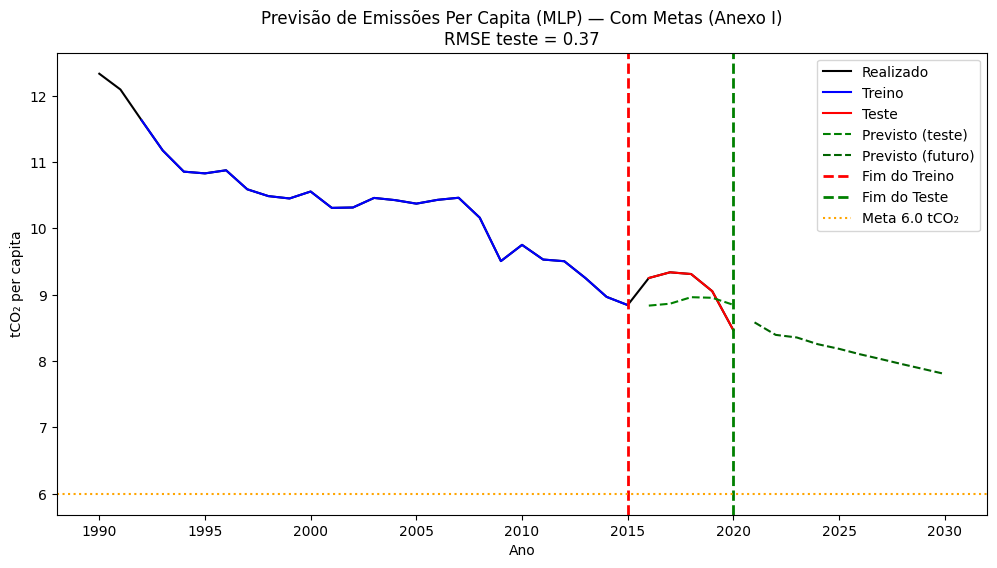

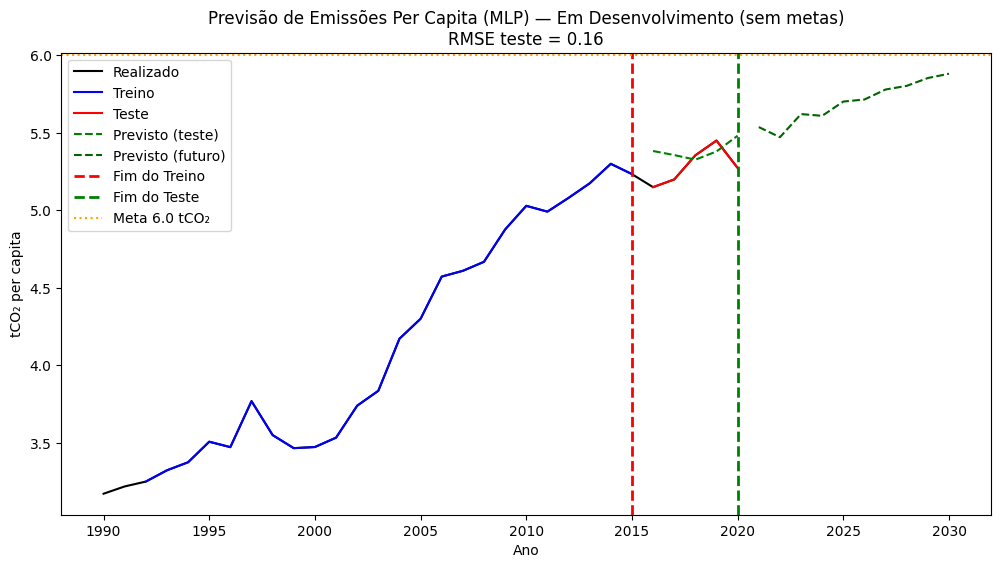

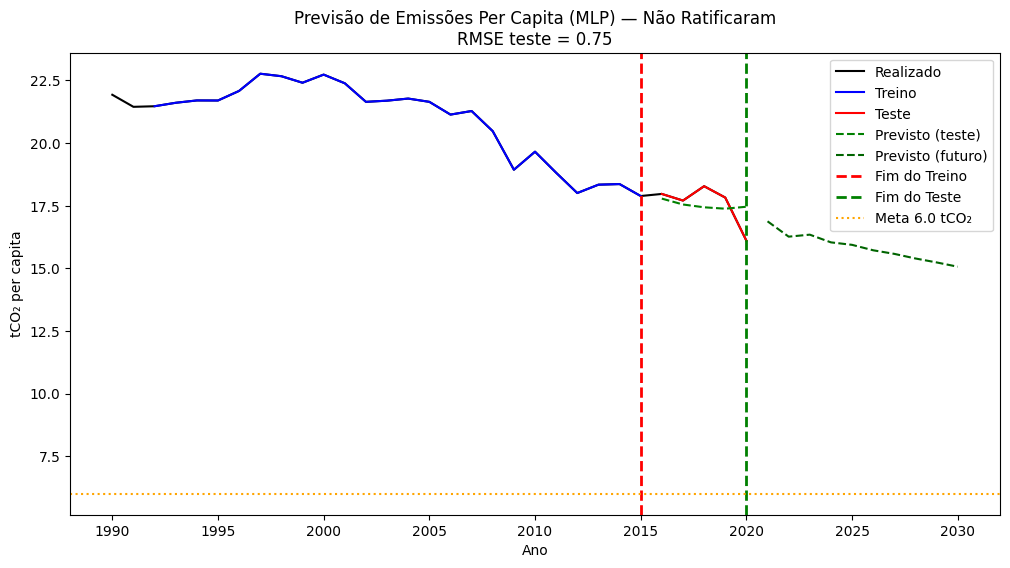

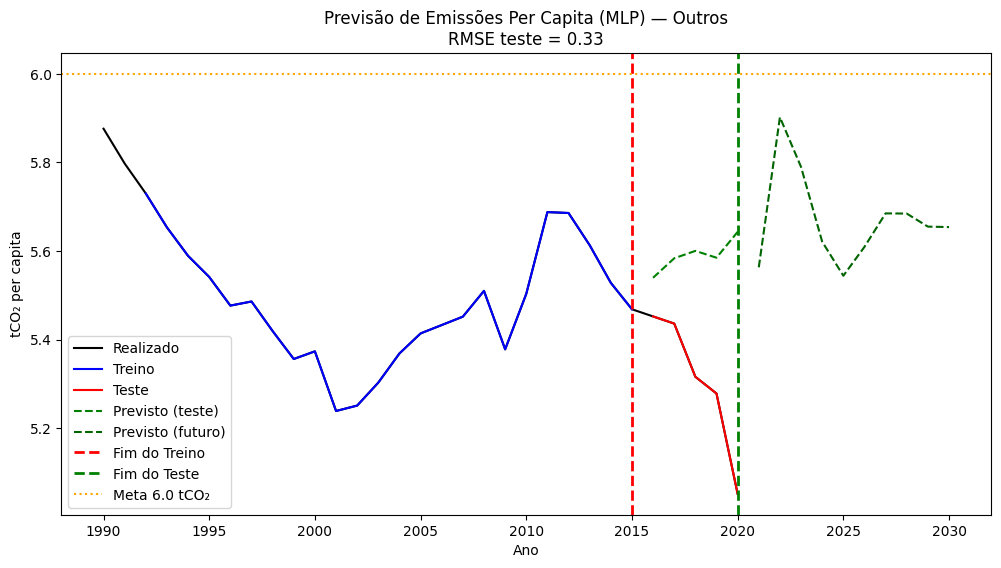

In [437]:
for grupo, S in splits.items():
    treino, teste = S['treino'], S['teste']
    yhat_te = prev_teste[grupo]
    fut = futuros_mlp[grupo]

    # série observada completa (sem lags perdidos)
    obs = df_base[df_base['grupo_quioto']==grupo][['ano','percapita_t','ds']].copy()
    ds_tr = pd.to_datetime(treino['ano'].astype(int).astype(str) + '-01-01')
    ds_te = pd.to_datetime(teste['ano'].astype(int).astype(str)  + '-01-01')

    plt.figure(figsize=(12,6))
    # Realizado
    plt.plot(obs['ds'], obs['percapita_t'], color='black', label='Realizado')
    # Treino e Teste (observado)
    plt.plot(ds_tr, treino['percapita_t'], color='blue', label='Treino')
    plt.plot(ds_te, teste['percapita_t'],  color='red',  label='Teste')
    # Previsto (teste + futuro)
    plt.plot(ds_te, yhat_te, linestyle='--', color='green', label='Previsto (teste)')
    if not fut.empty:
        plt.plot(fut['ds'], fut['yhat'], linestyle='--', color='darkgreen', label='Previsto (futuro)')

    # Cortes e meta
    plt.axvline(pd.to_datetime(f'{ANO_TREINO_FIM}-01-01'), color='r', linestyle='--', lw=2, label='Fim do Treino')
    plt.axvline(pd.to_datetime(f'{ANO_TESTE_FIM}-01-01'),  color='g', linestyle='--', lw=2, label='Fim do Teste')
    plt.axhline(META_CO2, color='orange', linestyle=':', label=f'Meta {META_CO2} tCO₂')

    plt.title(f'Previsão de Emissões Per Capita (MLP) — {grupo}\nRMSE teste = {rmse_mlp[grupo]:.2f}')
    plt.xlabel('Ano'); plt.ylabel('tCO₂ per capita')
    plt.legend(); plt.show()


In [438]:
# 1) pegar 2030 do Prophet a partir de 'resultados_prophet'
y2030_prophet = {}
for g, prev in resultados_prophet.items():
    linha = prev[prev['ds'].dt.year == ANO_PREVISAO_FIM]
    y2030_prophet[g] = float(linha['yhat'].iloc[0]) if not linha.empty else np.nan

# 2) pegar 2030 do MLP a partir de 'futuros_mlp'
y2030_mlp = {}
for g in df_base['grupo_quioto'].unique():
    fut = futuros_mlp.get(g)
    if fut is None or fut.empty:
        y2030_mlp[g] = np.nan
    else:
        linha = fut[fut['ds'].dt.year == ANO_PREVISAO_FIM]['yhat']
        y2030_mlp[g] = float(linha.iloc[0]) if not linha.empty else np.nan

# 3) montar a comparação final (números)
linhas = []
for g in sorted(df_base['grupo_quioto'].unique()):
    rp = rmse_prophet.get(g, np.nan)
    rm = rmse_mlp.get(g, np.nan)
    p2030 = y2030_prophet.get(g, np.nan)
    m2030 = y2030_mlp.get(g, np.nan)
    linhas.append({
        "Grupo": g,
        "RMSE Prophet (16–20)": rp,
        "RMSE MLP (16–20)": rm,
        "2030 Prophet": p2030,
        "2030 MLP": m2030,
        "Δ 2030 (MLP − Prophet)": (m2030 - p2030) if (pd.notna(m2030) and pd.notna(p2030)) else np.nan,
        "Meta ≤6 (Prophet)": (p2030 <= META_CO2) if pd.notna(p2030) else np.nan,
        "Meta ≤6 (MLP)": (m2030 <= META_CO2) if pd.notna(m2030) else np.nan,
    })

comparacao_df = pd.DataFrame(linhas).sort_values("Grupo").reset_index(drop=True)
comparacao_df


,Grupo,RMSE Prophet (16–20),RMSE MLP (16–20),2030 Prophet,2030 MLP,Δ 2030 (MLP − Prophet),Meta ≤6 (Prophet),Meta ≤6 (MLP)
0,Com Metas (Anexo I),0.743898,0.367609,6.330039,7.805937,1.475898,False,False
1,Em Desenvolvimento (sem metas),0.526697,0.159962,7.222868,5.880868,-1.342000,False,True
2,Não Ratificaram,1.170867,0.747324,12.122351,15.061032,2.938681,False,False
3,Outros,0.418348,0.332660,5.962211,5.653834,-0.308377,True,True


In [439]:
comparacao_df.sort_values("RMSE Prophet (16–20)").head()
# ou
comparacao_df.sort_values("RMSE MLP (16–20)").head()


,Grupo,RMSE Prophet (16–20),RMSE MLP (16–20),2030 Prophet,2030 MLP,Δ 2030 (MLP − Prophet),Meta ≤6 (Prophet),Meta ≤6 (MLP)
1,Em Desenvolvimento (sem metas),0.526697,0.159962,7.222868,5.880868,-1.342000,False,True
3,Outros,0.418348,0.332660,5.962211,5.653834,-0.308377,True,True
0,Com Metas (Anexo I),0.743898,0.367609,6.330039,7.805937,1.475898,False,False
2,Não Ratificaram,1.170867,0.747324,12.122351,15.061032,2.938681,False,False


## 📚 Referências e Contextualização

- **World Bank**. (2024). *CO₂ emissions (metric tons per capita)*.  
  O Banco Mundial fornece séries históricas de emissões de CO₂ per capita, medida em toneladas métricas por habitante.  
  Esses dados são amplamente utilizados em estudos de comparação internacional.  
  Disponível em: [https://data.worldbank.org/indicator/EN.ATM.CO2E.PC](https://data.worldbank.org/indicator/EN.ATM.CO2E.PC)

- **Our World in Data**. (2024). *CO₂ emissions per capita*.  
  Base consolidada que utiliza dados do **Global Carbon Project**, permitindo análises visuais e download de séries temporais.  
  Mostra claramente diferenças regionais: EUA > 15 t/hab, União Europeia entre 7–9 t/hab, China crescendo até 8 t/hab, Brasil estabilizado em torno de 2–3 t/hab.  
  Disponível em: [https://ourworldindata.org/grapher/co-emissions-per-capita](https://ourworldindata.org/grapher/co-emissions-per-capita)

- **EDGAR – Emissions Database for Global Atmospheric Research**. (2023). *GHG Emissions of All World Countries*.  
  Mantido pelo **Joint Research Centre (JRC)** da Comissão Europeia, traz dados consistentes de gases de efeito estufa (CO₂, CH₄, N₂O).  
  A base do EDGAR é usada em relatórios da ONU e IPCC, sendo referência para estimar compromissos internacionais.  
  Disponível em: [https://south.euneighbours.eu/wp-content/uploads/2023/09/ghg-emissions-of-all-world-countries-KJNA31658ENN_compressed.pdf](https://south.euneighbours.eu/wp-content/uploads/2023/09/ghg-emissions-of-all-world-countries-KJNA31658ENN_compressed.pdf)

- **IPCC – Intergovernmental Panel on Climate Change**. (2022). *AR6, WGIII, Chapter 2: Emissions Trends and Drivers*.  
  O AR6 apresenta a visão científica mais atualizada sobre as trajetórias de emissões.  
  Destaca que países desenvolvidos tiveram reduções relativas desde 1990, enquanto países em desenvolvimento aumentaram emissões absolutas, mas ainda com valores per capita mais baixos.  
  Disponível em: [https://www.ipcc.ch/report/ar6/wg3/chapter/chapter-2](https://www.ipcc.ch/report/ar6/wg3/chapter/chapter-2)

- **KAPSARC / World Bank**. (2024). *Global CO₂ Emissions: Total and Per Capita (Excluding LULUCF)*.  
  Esta base combina dados do Banco Mundial e de pesquisas energéticas globais, excluindo emissões relacionadas a uso da terra e florestas (LULUCF).  
  Permite observar com clareza as diferenças per capita entre blocos de países — EUA e Canadá > 15 t/hab, União Europeia ~8 t/hab, Brasil ~2, Índia ~2, China crescendo até ~8.  
  Disponível em: [https://data.kapsarc.org/explore/dataset/global-co2-emissions-total-per-capita-excluding-lulucf-world-bank](https://data.kapsarc.org/explore/dataset/global-co2-emissions-total-per-capita-excluding-lulucf-world-bank)

- **EDGAR – Emissions Database for Global Atmospheric Research**. (2020). *Fossil CO₂ emissions of all world countries*.  
  Relatório consolidado sobre emissões fósseis, fundamental para contextualizar compromissos do Protocolo de Quioto e do Acordo de Paris.  
  Segundo este relatório, a média global em 2019 foi de **~6,47 tCO₂e per capita**, valor usado como referência em negociações internacionais.  
  Disponível em: [https://edgar.jrc.ec.europa.eu/report_2020?vis=pop](https://edgar.jrc.ec.europa.eu/report_2020?vis=pop)
